Definição do problema

O naufrágio do Titanic foi um dos maiores desastres na história. Ocorrido em 15 de abril de 1912, após uma colisão com um iceberg, o navio afundou. O saldo final da tragédia foi um total de 1502 mortos de um total de 2224 pessoas (incluindo passageiros e tripulação). Um dos motivos para o grande número de vítimas (cerca de 68%) diz respeito à quantidade de botes bem inferior ao mínimo que seria necessário.

Nessa situação, apesar do fator "sorte" ter feito parte na sobrevivência dos passageiros do Titanic, existiram grupos de pessoas que tinham uma maior probabilidade de escaparem da morte (como por exemplo mulheres, crianças e passageiros viajando na primeira-classe)

Dentro desse contexto, o site Kaggle fornece então um conjunto de dados aos competidores do desafio, contendo algumas informações (nome, idade, sexo, sobreviveu(sim/não), etc.) sobre 891 passageiros.

A idáia é consuzir uma análise e criar um modelo capaz de prever, com maior acurária possível, a condição de sobrevivência para os passageiros restantes

In [ ]:
# Análise de dados
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

dados = pd.read_csv('train.csv')
test_dados = pd.read_csv('train.csv')

In [ ]:
# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
# Classe de Regressão Linear
from sklearn.linear_model import LinearRegression

In [ ]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dados['Sex'] = dados['Sex'].astype('category')
dados['Sex'] = dados['Sex'].cat.codes
dados['Embarked'] = dados['Embarked'].astype('category')
dados['Embarked'] =dados['Embarked'].cat.codes

Preparação e limpeza dos dados

In [ ]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [ ]:
dados.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,1


Significado das variáveis

Com as 5 primeiras entradas impressas na tela, pode-se ter então uma noção de como os dados estão estruturados, bem como quais são as variáveis mais importantes para o início da investigação. Segue o significado de cada coluna do DataFrame:

PassengerId: ID do passageiro

*   PassengerId: ID do passageiro
*   Survived: Sobreviveu (== 0) ou Faleceu (== 1)
*   Pclass: Classe do passageiro (1st, 2nd, 3rd)
*   Name: Nome do passageiro
*   Sex: Sexo do passageiro
*   Age: Idade
*   SibSp: Número de irmãos/cônjuge a bordo (define as relações familiares)
*   Parch: Número de pais/filhos a bordo (crianças viajando com babás apenas, recebem parch = 0)
*   Ticket: Número do ticket de embarque
*   Fare: Tarifa paga pelo passageiro
*   Cabin: Número da cabine
*   Embarked: Porto de embarque




In [ ]:
print('_'*40)
dados.info()
print('_'*40)
dados.describe()


________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int8   
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int64(5), int8(2), object(3)
memory usage: 71.5+ KB
________________________________________


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.529742
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.800254
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


O método .info() retorna um resumo conciso do DataFrame, permitindo identificar o tipo da variável em cada coluna. Já o método .describe() retorna diferentes características das colunas numéricas do DataFrame.

Com isso, é possível identificar que as colunas que possuem valores nulos ou em branco (ou seja, seus dados precisam ser corrigidos) são:

*   'Cabin'
*   'Age'
*   'Embarked'

Como existem poucos valores lançados para a categoria 'Cabin', além de não se enxergar inicialmente nenhuma influênca, preferiu-se desconsiderar esta coluna.

Na coluna 'Age', os valores NaN serão substituidos pela sua mediana, o que parece ser mais razoável que excluir uma linha inteira que pode conter outros dados importantes. Na coluna 'Embarked', as lacunas serão substituidas pelo valor de maior frequência.

In [ ]:
dados = dados.drop(columns = 'Cabin')
dados = dados.drop(columns = 'Name')
dados = dados.drop(columns = 'Ticket')
dados = dados.drop(columns = 'PassengerId')
dados['Age'].fillna(value = dados['Age'].mean(),  inplace = True) 

In [ ]:
# Verificando a frequência dos valores de 'Embarked'
print(dados['Embarked'].unique())
print(dados['Embarked'].value_counts())
# Substituindo os valores nulos de 'Embarked' por 'S'
dados.loc[dados['Embarked'].isnull(), 'Embarked'] = 'S'

# Substituindo os valores nulos de 'Age' pela mediana da coluna
dados.loc[dados['Age'].isnull(), 'Age'] = dados['Age'].median()

# Verificando 'Age' com o método .describe(), agora sem dados nulos (NaN)
dados['Age'].describe(percentiles=[.1, .25, .5, .75, .99])

[ 2  0  1 -1]
 2    644
 0    168
 1     77
-1      2
Name: Embarked, dtype: int64


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
10%       16.000000
25%       22.000000
50%       29.699118
75%       35.000000
99%       65.000000
max       80.000000
Name: Age, dtype: float64

print(dados[['Age', 'Idade']].groupby(['Age']).mean())print(dados[['Age', 'Idade']].groupby(['Age']).mean())print(dados[['Age', 'Idade']].groupby(['Age']).mean())print(dados[['Age', 'Idade']].groupby(['Age']).mean())ggggggggggggAnálise, identificação de padrões e exploração dos dados

Inicialmente, vamos considerar a hipótese de que crianças e mulheres teriam tido mais chances de sobreviver, uma vez que provavelmente foram as primeiras a serem embarcadas nos botes.

Para isso, vamos ver a porcentagem de sobreviventes na categoria 'Sex', analisar o histograma da distribuição das idades, classificar todos os passageiros em 3 grupos (Crianças, adultos e idosos) para vermos a porcentagem de sobreviventes em cada uma delas, e por último analisar se há diferença entre os passageiros das diferentes classes no navio.

AttributeError: ignored

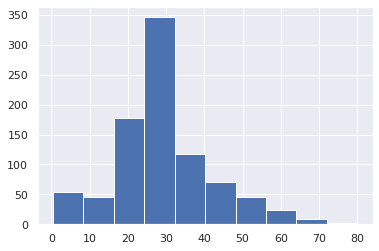

In [ ]:
# Histograma de idades
sns.set()
plt.hist(dados["Age"], normed=True, alpha=0.8)
plt.xlabel("Idade")
plt.show()


['male' 'female']
        Survived
Sex             
female  0.742038
male    0.188908


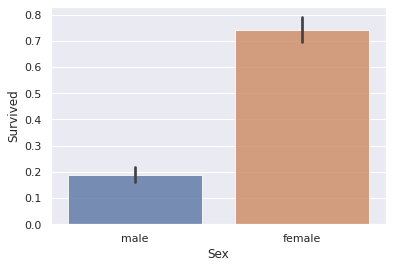

In [ ]:
print(dados['Sex'].unique())
print(dados[['Sex', "Survived"]].groupby(['Sex']).mean())
plot = sns.barplot(x='Sex', y='Survived', data=dados, alpha=.8)

           Survived
Age_Group          
Adulto     0.365059
Criança    0.539823
Idoso      0.090909


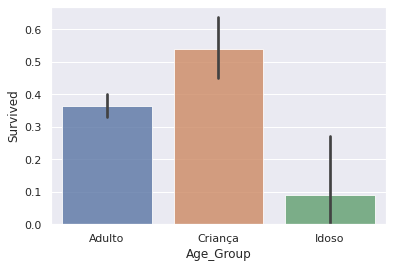

In [ ]:
def check_age(age):
    """ Identifica o grupo etário do qual o passageiro faz parte.
    
    :param age: <float> representando a idade do passageiro
    :return: <string> com o grupo etário equivalente
    """
    if age < 18:
        return 'Criança'
    elif (age >= 18 ) and (age < 65):
        return 'Adulto'
    else:
        return 'Idoso'

dados['Age_Group'] = dados['Age'].apply(check_age)
print(dados[['Age_Group', 'Survived']].groupby(['Age_Group']).mean())

plot = sns.barplot(x='Age_Group', y='Survived', data = dados, alpha=.8)

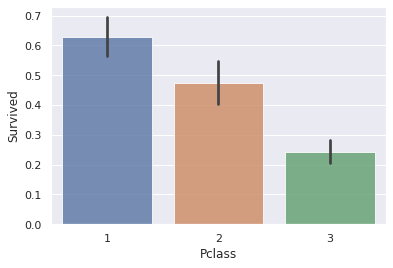

In [ ]:
plot = sns.barplot(x='Pclass', y='Survived', data = dados, alpha=.8)

In [ ]:
print(dados[['Embarked', 'Survived']].groupby(['Embarked']).mean())

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


Análise preliminar

*   A categoria 'Survived' é binária. Ou seja, 1 caso o passageiro tenha sobrevivido; 0 caso tenha falecido.
*   Cerca de 62% dos passageiros do dataset de treino não sobreviveram, ficando próximo à porcentagem do total de 68% (1502 não-sobreviventes / 2224 passageiros).
*   Cerca de 75% dos passageiros têm até 35 anos.
*   Menos de 1% dos passageiros têm mais de 65 anos.
*   Alinhado com a hipótese inicial, mulheres e crianças sobreviveram proporcionalmente mais.
*   Passageiros que embarcaram pelo Porto 'C' sobreviveram mais que 'Q' e 'S'.





Convertendo Sex e Embarked para valores numéricos

In [ ]:
# 'Sex'        male = 0   female = 1
dados.loc[dados['Sex'] == 'male', 'Sex'] = 0
dados.loc[dados['Sex'] == 'female', 'Sex'] = 1

# 'Embarked'   'S' = 0    'C' = 1    'Q' = 2
dados.loc[dados['Embarked'] == 'S', 'Embarked'] = 0
dados.loc[dados['Embarked'] == 'C', 'Embarked'] = 1
dados.loc[dados['Embarked'] == 'Q', 'Embarked'] = 2

Previsões com Machine Learning
A Regressão Linear pode ser definida como uma equação que visa estimar o valor esperado de uma variável y, dados alguns valores de outras variáveis x. A mesma considera que as relações existentes entre as variáveis dependentes e as de entradas são lineares, do tipo y = mx + b. Neste caso, o valor de y é o que queremos prever, m é um coeficiente angular, x é o valor de uma dada coluna, e b* é uma constante.

Apesar desse modelo de previsão ser poderoso, tem alguns pontos negativos, como por exemplo o fato de não conseguir captar as não-lineariedades que possam existir no dataset de treino, e também o fato de não apresentar probabilidades de sobrevivência (apresenta apenas o valor binário).

Validação Cruzada A validação cruzada servirá para treinarmos o algoritmo em um conjunto de dados diferentes daqueles em que faremos a previsão. Este passo é considerado crítico para se evitar um overfitting do modelo (ou seja, evitar um fit no ruído).

Utilizaremos o Método k-fold para a validação cruzada, quando dividiremos os dados em 3 partes (folds) e procederemos da seguinte maneira:

1.   Combinar as duas primeiras partes, treinar o modelo e fazer a previsão na terceira parte;
2.   Combinar a primeira e terceira parte, treinar o modelo e fazer a previsão na segunda; e
3.   Combinar a segunda e a terceira parte, treinar o modelo e fazer a previsão na primeira.

Faremos uso da biblioteca (excelente!) scikit-learn, que facilita muito o fluxo de trabalho.

Regressão Linear

In [ ]:
# Colunas que serão utilizadas para fazer a previsão
predictors = ['Sex', 'Age', 'Pclass', 'Embarked']

# Inicialização da classe do algoritmo

x = dados.drop(columns = 'Survived')
y = dados['Survived']

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste  = train_test_split(x, y, test_size = 0.5, random_state=0)

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)








LinearRegression()

In [ ]:
interceptacao = modelo.intercept_
interceptacao

1.3080531549439716

In [ ]:
coeficientes = modelo.coef_
coeficientes

array([-0.14775169, -0.50895608, -0.00530479, -0.03796916, -0.01315792,
        0.00054061, -0.04691774])

In [ ]:
y_predicao_treinamento = modelo.predict(x_treino)
y_predicao_treinamento

array([ 0.25764244,  0.16854222,  0.13890605,  0.12346022,  0.64254609,
        0.26660549,  0.79401001,  0.26029276,  0.38971745,  0.25221061,
        0.16015678,  0.83767423,  0.1475563 ,  0.99278728,  0.10678224,
        0.13766951,  0.36661372,  0.20220033,  0.62201764,  0.737204  ,
        0.80394016,  0.11262216,  0.12835053,  0.80009764,  0.67647943,
        0.87153561,  0.28416639,  1.04265391,  0.1186082 ,  0.22976696,
        0.63074307,  0.16089785,  0.50878396,  0.10542624,  0.0469174 ,
        0.35400692,  0.74537935,  0.76396804,  0.01754686,  0.20060648,
        0.83197917,  0.15035585,  0.60465803,  0.59696365,  1.07045086,
        0.04147141,  0.42573351,  0.33798602,  0.70465462,  0.16671396,
       -0.0238011 ,  0.74264873,  0.17650813,  0.10881084,  0.66954984,
        0.61776692,  0.11564711,  0.48003094,  0.56180734,  0.14936696,
       -0.0257029 ,  0.86415117,  0.18048975,  0.66737317,  0.14965305,
        0.13319807,  0.09649929,  0.15556641,  0.65437272,  0.32

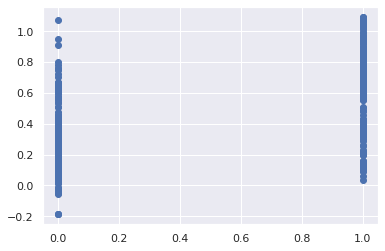

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_treino, y_predicao_treinamento)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_treino, y_predicao_treinamento)

0.40959085816700735

**Previsão de sobrevivência por passageiro**

In [ ]:
rndforest = RandomForestClassifier(n_estimators = 1000,
                                   criterion = 'gini',
                                   max_depth= 5)
rndforest.fit(x_treino, y_treino)

probabilidade = rndforest.predict_proba(dados.drop('Survived', axis = 1))[:,1]
dados['probabilidade'] = probabilidade

**Resultado**

In [ ]:
dados

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,probabilidade
0,0,3,1,22.000000,1,0,7.2500,2,0.140761
1,1,1,0,38.000000,1,0,71.2833,0,0.933638
2,1,3,0,26.000000,0,0,7.9250,2,0.546197
3,1,1,0,35.000000,1,0,53.1000,2,0.899610
4,0,3,1,35.000000,0,0,8.0500,2,0.132819
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,0.162891
887,1,1,0,19.000000,0,0,30.0000,2,0.853604
888,0,3,0,29.699118,1,2,23.4500,2,0.429109
889,1,1,1,26.000000,0,0,30.0000,0,0.428325


**Calculo de acuracia **

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)
resultado_knn = knn.predict(x_teste)

from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_teste, resultado_knn)

from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_teste, resultado_knn)

print('Acurácia: %f' % acuracia)

Acurácia: 0.668161


In [ ]:
from sklearn.metrics import precision_score 
precision = precision_score(y_teste, resultado_knn)
print('Precisão: %f' % precision)

Precisão: 0.547170


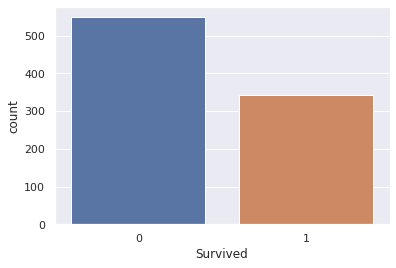

In [ ]:
sns.countplot(dados['Survived'])

In [ ]:
dados['Survived'].groupby(dados['Sex']).mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

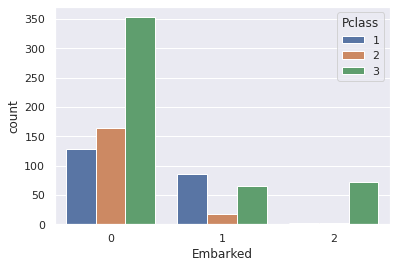

In [ ]:
sns.countplot(dados['Embarked'], hue=dados['Pclass'])

In [ ]:

print(dados[['Embarked', 'Survived']].groupby(['Embarked']).mean())

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957
